In [171]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from importlib import reload
import warnings
import video as v
from cv2 import cvtColor,COLOR_HLS2RGB
from downloader import download_video

In [172]:
warnings.simplefilter("ignore")
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


In [177]:
reload(v)
df= v.get_vid_df('videos/Plant explosion caught on camera.mp4')
df.attrs['fps']

30

In [ ]:
df.head()

hue  lightness  saturation
frame y x                            
0     0 0  122         24          92
        1  122         24          92
        2  122         24          92
        3  122         24          92
        4  117         23         100

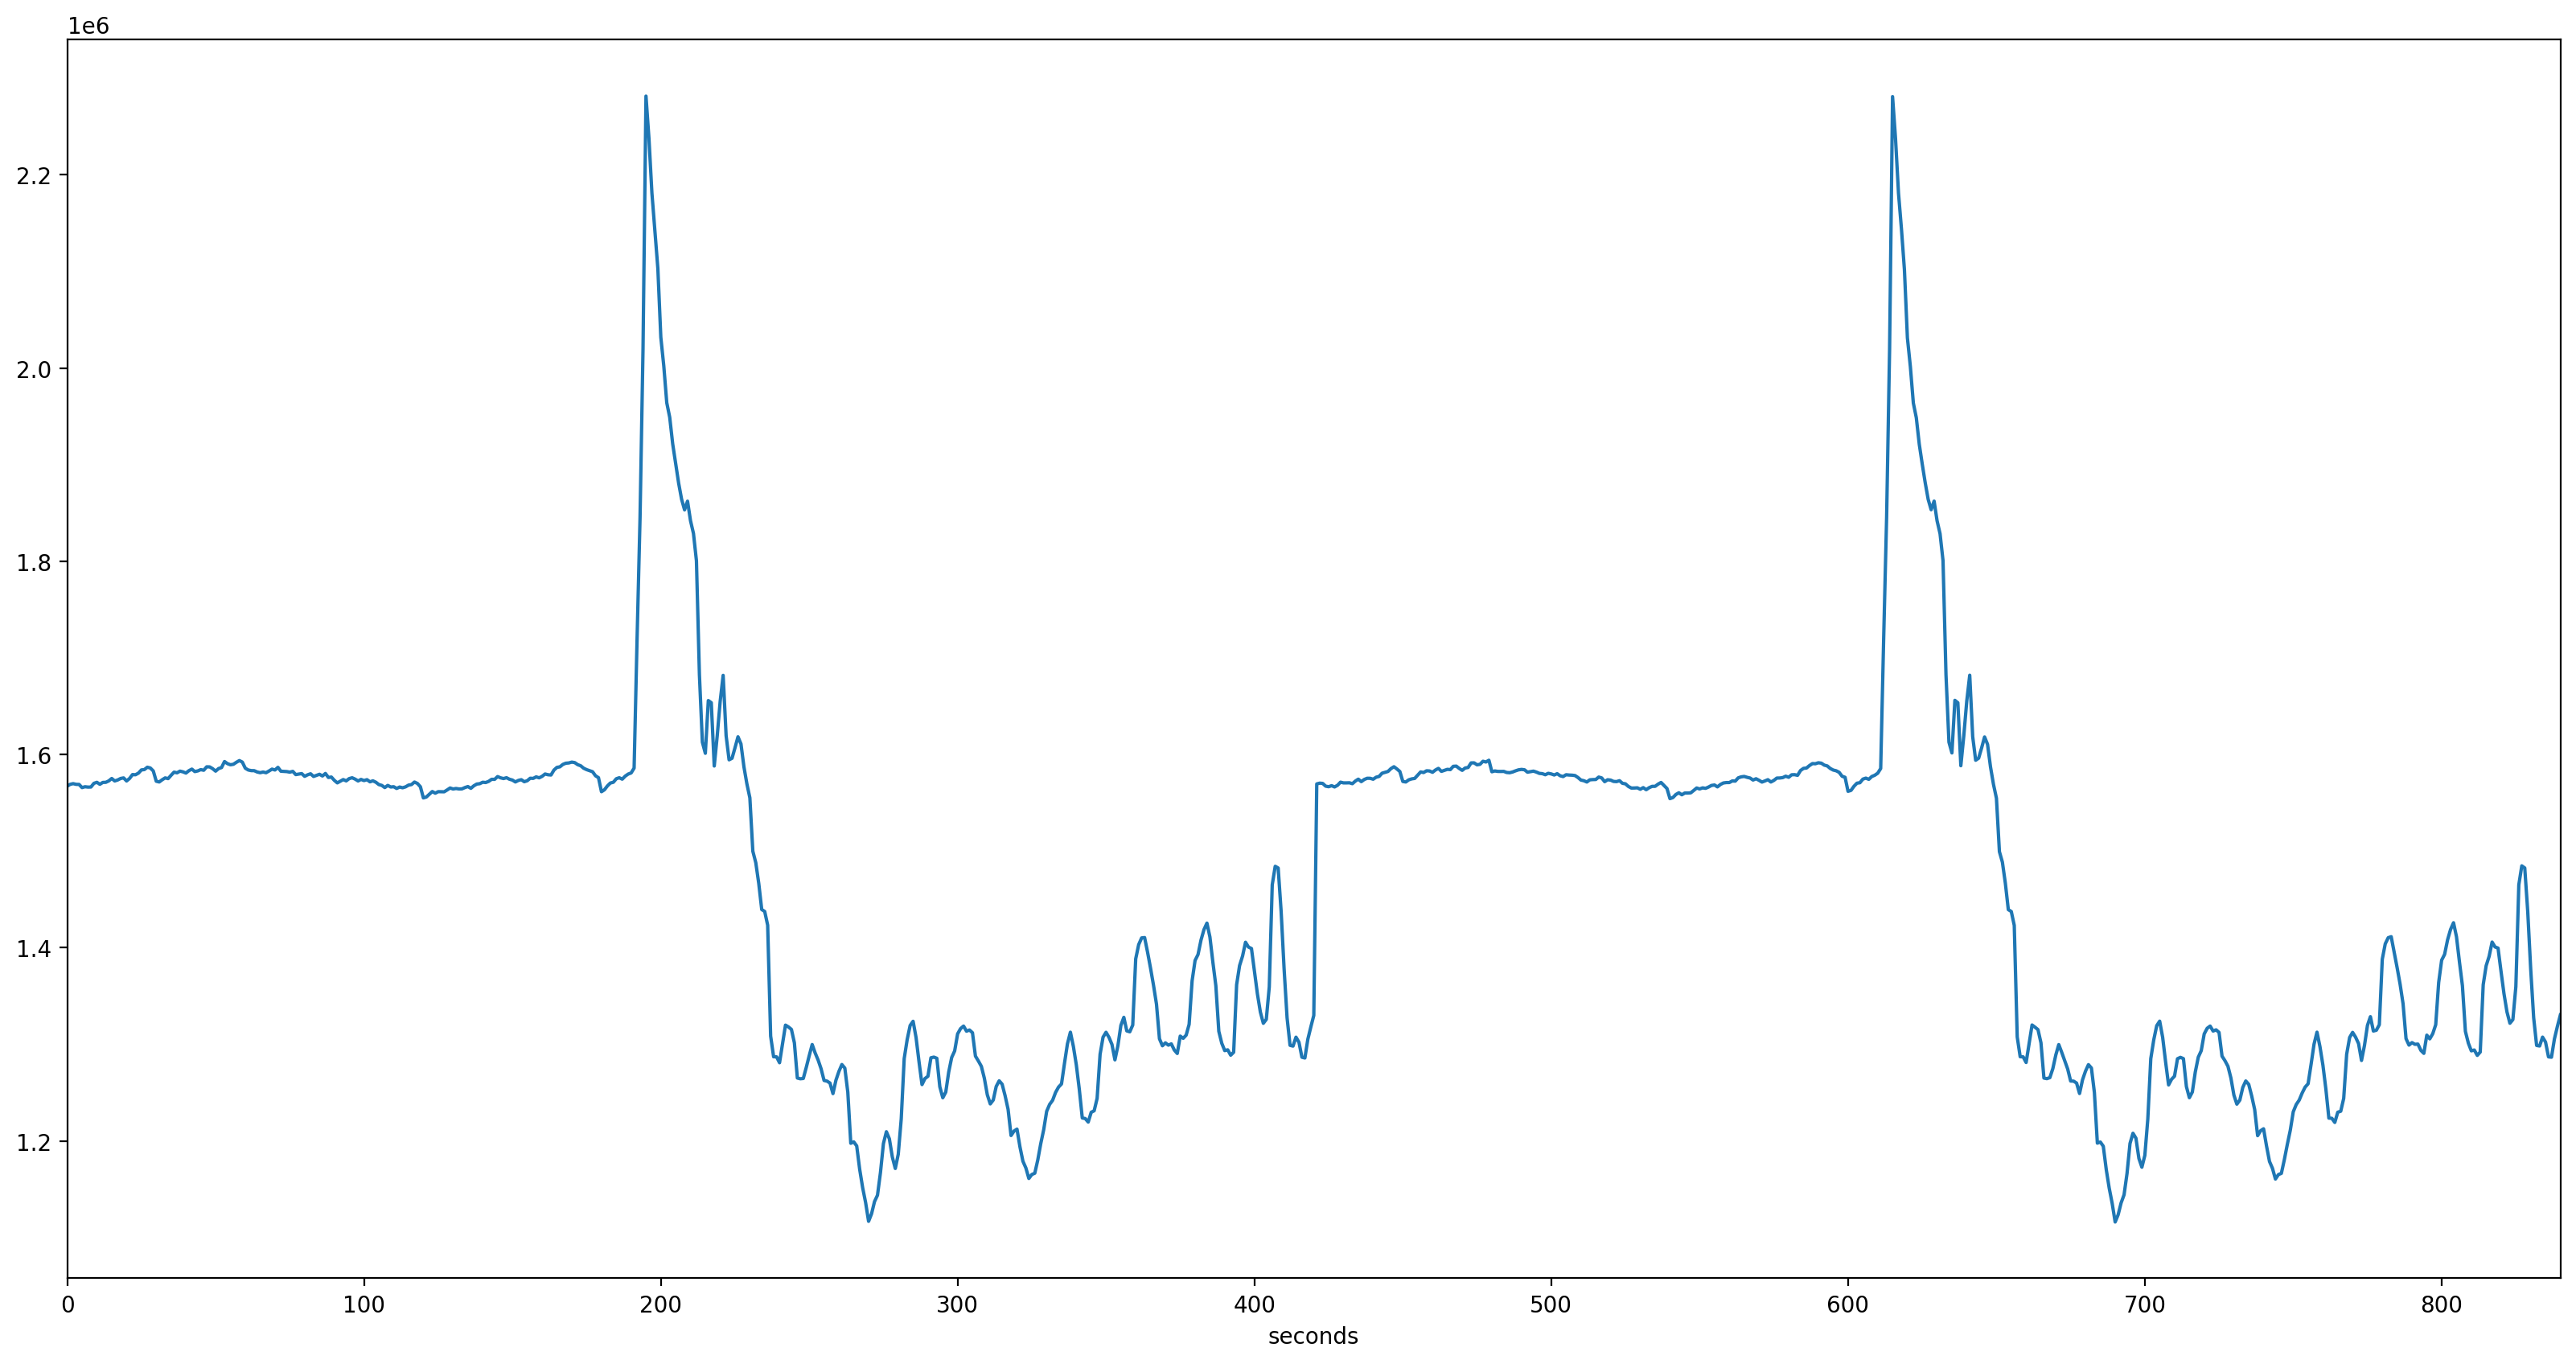

In [ ]:
plt.figure(figsize=(20,10))
val = df.groupby('frame').lightness.sum().plot.line()
val.set_xlim((0,df.index.get_level_values(0).max()))

# val.set_xticklabels(val.get_xticks() // fps)
val.set_xlabel('seconds')
plt.show()

In [ ]:
df.attrs['fps'] = 30

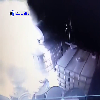

In [ ]:
from PIL import Image
frame = df[df.index.get_level_values(0) == 400].to_numpy().reshape((100,100,3))
frame = cvtColor(frame,COLOR_HLS2RGB)
Image.fromarray(frame)